# Cats vs. Dogs Class Activation Maps



## Imports

In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf

import keras
from keras.models import Sequential,Model
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,GlobalAveragePooling2D
from keras.utils import plot_model

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import cv2

## Download and Prepare the Dataset

We will use the [Cats vs Dogs](https://www.tensorflow.org/datasets/catalog/cats_vs_dogs) dataset and we can load it via Tensorflow Datasets. The images are labeled 0 for cats and 1 for dogs.

In [2]:
train_data = tfds.load('cats_vs_dogs', split='train[:80%]', as_supervised=True)
validation_data = tfds.load('cats_vs_dogs', split='train[80%:90%]', as_supervised=True)
test_data = tfds.load('cats_vs_dogs', split='train[-10%:]', as_supervised=True)

The cell below will preprocess the images and create batches before feeding it to the model.

In [3]:
def augment_images(image, label):

  # cast to float
  image = tf.cast(image, tf.float32)
  # normalize the pixel values
  image = (image/255)
  # resize to 300 x 300
  image = tf.image.resize(image,(300,300))

  return image, label

# use the utility function above to preprocess the images
augmented_training_data = train_data.map(augment_images)

# shuffle and create batches before training
train_batches = augmented_training_data.shuffle(1024).batch(32)

## Build the classifier



In [4]:
model = Sequential()
model.add(Conv2D(16,input_shape=(300,300,3),kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(GlobalAveragePooling2D())
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 300, 300, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 150, 150, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 150, 150, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 37, 37, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 97,569 (381.13 KB)

 Trainable params: 97,569 (381.13 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:

model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001))
model.fit(train_batches, epochs=15)

Epoch 1/15
582/582 ━━━━━━━━━━━━━━━━━━━━ 56s 81ms/step - accuracy: 0.5537 - loss: 0.6807
Epoch 2/15
582/582 ━━━━━━━━━━━━━━━━━━━━ 47s 78ms/step - accuracy: 0.6140 - loss: 0.6471
Epoch 3/15
582/582 ━━━━━━━━━━━━━━━━━━━━ 81s 76ms/step - accuracy: 0.6473 - loss: 0.6259
Epoch 4/15
582/582 ━━━━━━━━━━━━━━━━━━━━ 46s 76ms/step - accuracy: 0.6749 - loss: 0.6064
Epoch 5/15
582/582 ━━━━━━━━━━━━━━━━━━━━ 46s 76ms/step - accuracy: 0.6854 - loss: 0.5912
Epoch 6/15
582/582 ━━━━━━━━━━━━━━━━━━━━ 45s 75ms/step - accuracy: 0.7060 - loss: 0.5767
Epoch 7/15
582/582 ━━━━━━━━━━━━━━━━━━━━ 40s 65ms/step - accuracy: 0.7113 - loss: 0.5701
Epoch 8/15
582/582 ━━━━━━━━━━━━━━━━━━━━ 40s 65ms/step - accuracy: 0.7190 - loss: 0.5603
Epoch 9/15
582/582 ━━━━━━━━━━━━━━━━━━━━ 39s 65ms/step - accuracy: 0.7251 - loss: 0.5512
Epoch 10/15
582/582 ━━━━━━━━━━━━━━━━━━━━ 40s 66ms/step - accuracy: 0.7306 - loss: 0.5416
Epoch 11/15
582/582 ━━━━━━━━━━━━━━━━━━━━ 39s 65ms/step - accuracy: 0.7397 - loss: 0.5315
Epoch 12/15
582/582 ━━━━━━━━━━

## Building the CAM model


In [9]:
gap_weights = model.layers[-1].get_weights()[0]
gap_weights.shape

# cam_model  = Model(inputs=model.input,outputs=(model.layers[-3].output,model.layers[-1].output))
# cam_model.summary()
# Instead of directly using model.input, use model.layers[0].input
cam_model  = Model(inputs=model.layers[0].input,outputs=(model.layers[-3].output,model.layers[-1].output))
cam_model.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 300, 300, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 300, 300, 16)   │            448 │ input_layer[0][0],     │
│                           │                        │                │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 150, 150, 16)   │              0 │ conv2d[6][0],          │
│ (MaxPooling2D)            │                        │                │ conv2d[8][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 150, 150, 32)   │          4,640 │ max_pooling2d[5][0],   │
│                           │                        │                │ max_pooling2d[7][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 75, 75, 32)     │              0 │ conv2d_1[4][0],        │
│ (MaxPooling2D)            │                        │                │ conv2d_1[6][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 75, 75, 64)     │         18,496 │ max_pooling2d_1[3][0], │
│                           │                        │                │ max_pooling2d_1[5][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 37, 37, 64)     │              0 │ conv2d_2[2][0],        │
│ (MaxPooling2D)            │                        │                │ conv2d_2[4][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 37, 37, 128)    │         73,856 │ max_pooling2d_2[1][0], │
│                           │                        │                │ max_pooling2d_2[3][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d  │ (None, 128)            │              0 │ conv2d_3[2][0]         │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 1)              │            129 │ global_average_poolin… │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 97,569 (381.13 KB)

 Trainable params: 97,569 (381.13 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
def show_cam(image_value, features, results):
  '''
  Displays the class activation map of an image

  Args:
    image_value (tensor) -- preprocessed input image with size 300 x 300
    features (array) -- features of the image, shape (1, 37, 37, 128)
    results (array) -- output of the sigmoid layer
  '''

  # there is only one image in the batch so we index at `0`
  features_for_img = features[0]
  prediction = results[0]

  # there is only one unit in the output so we get the weights connected to it
  class_activation_weights = gap_weights[:,0]

  # upsample to the image size
  class_activation_features = sp.ndimage.zoom(features_for_img, (300/37, 300/37, 1), order=2)

  # compute the intensity of each feature in the CAM
  cam_output  = np.dot(class_activation_features,class_activation_weights)

  # visualize the results
  print(f'sigmoid output: {results}')
  print(f"prediction: {'dog' if round(results[0][0]) else 'cat'}")
  plt.figure(figsize=(8,8))
  plt.imshow(cam_output, cmap='jet', alpha=0.5)
  plt.imshow(tf.squeeze(image_value), alpha=0.5)
  plt.show()


## Testing the Model


In [11]:
!wget -O cat1.jpg https://storage.googleapis.com/laurencemoroney-blog.appspot.com/MLColabImages/cat1.jpg
!wget -O cat2.jpg https://storage.googleapis.com/laurencemoroney-blog.appspot.com/MLColabImages/cat2.jpg
!wget -O catanddog.jpg https://storage.googleapis.com/laurencemoroney-blog.appspot.com/MLColabImages/catanddog.jpg
!wget -O dog1.jpg https://storage.googleapis.com/laurencemoroney-blog.appspot.com/MLColabImages/dog1.jpg
!wget -O dog2.jpg https://storage.googleapis.com/laurencemoroney-blog.appspot.com/MLColabImages/dog2.jpg

--2025-04-02 14:33:37--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/MLColabImages/cat1.jpg
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.207, 142.251.10.207, 142.251.12.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.207|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-04-02 14:33:38 ERROR 404: Not Found.

--2025-04-02 14:33:38--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/MLColabImages/cat2.jpg
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.207, 142.251.10.207, 142.251.12.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.207|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-04-02 14:33:39 ERROR 404: Not Found.

--2025-04-02 14:33:39--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/MLColabImages/catanddog.jpg
Resolving storage.googleapis.com (storage.googleapi

In [20]:
def convert_and_classify(image_path):
    """
    Preprocesses an image and shows the CAM.

    Args:
      image_path (str): Path to the image file.
    """
    try:
        # Load the image using Keras's image loading function
        img = keras.utils.load_img(image_path, target_size=(300, 300))

        # Convert the image to a NumPy array
        img = keras.utils.img_to_array(img)

        # Preprocess the image
        img = img / 255.0
        tensor_image = np.expand_dims(img, axis=0)

        # Define cam_model here
        cam_model = Model(inputs=model.input, outputs=(model.layers[-3].output, model.layers[-1].output))

        # Get the features and prediction
        features, results = cam_model.predict(tensor_image)

        # Generate the CAM
        show_cam(tensor_image, features, results)

    except Exception as e:
        print(f"Error processing image '{image_path}': {e}")

ground truth: cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 656ms/step
sigmoid output: [[0.45930246]]
prediction: cat


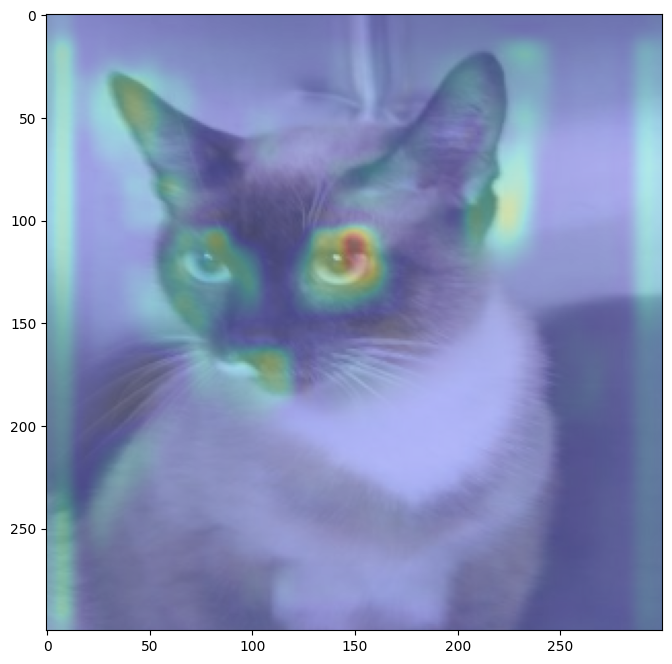

ground truth: dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
sigmoid output: [[0.36000806]]
prediction: cat


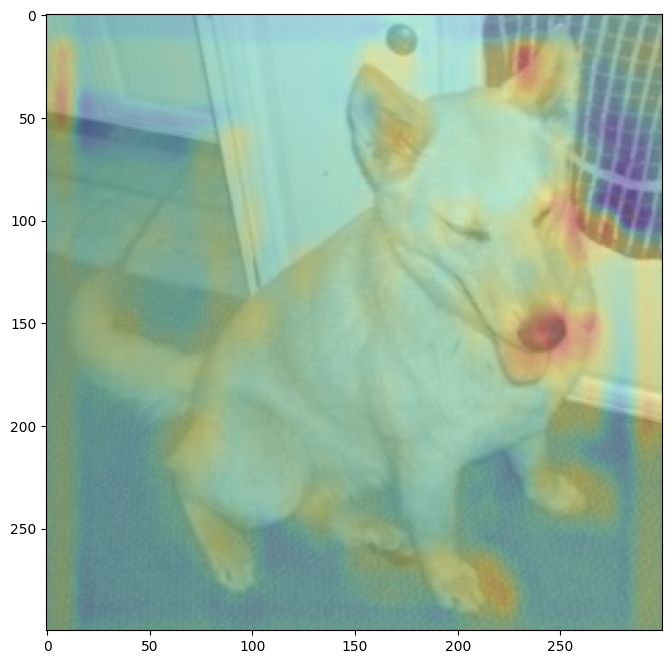

ground truth: dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
sigmoid output: [[0.3679511]]
prediction: cat


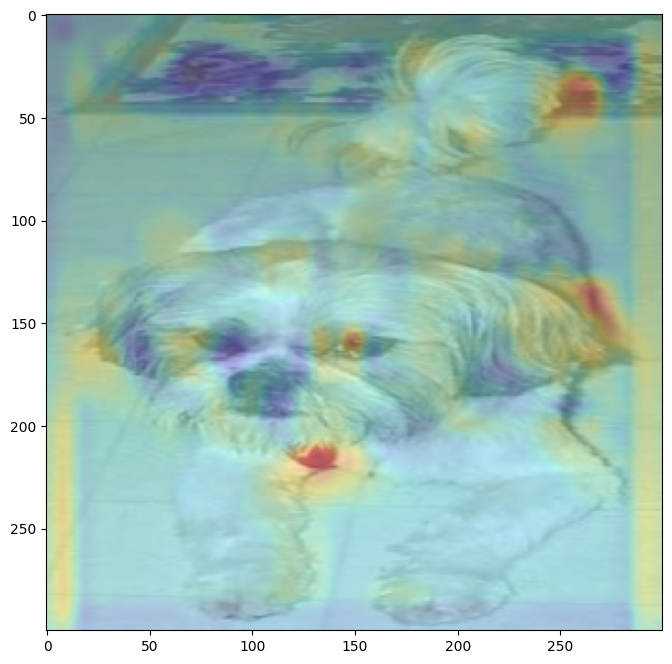

ground truth: cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
sigmoid output: [[0.20110229]]
prediction: cat


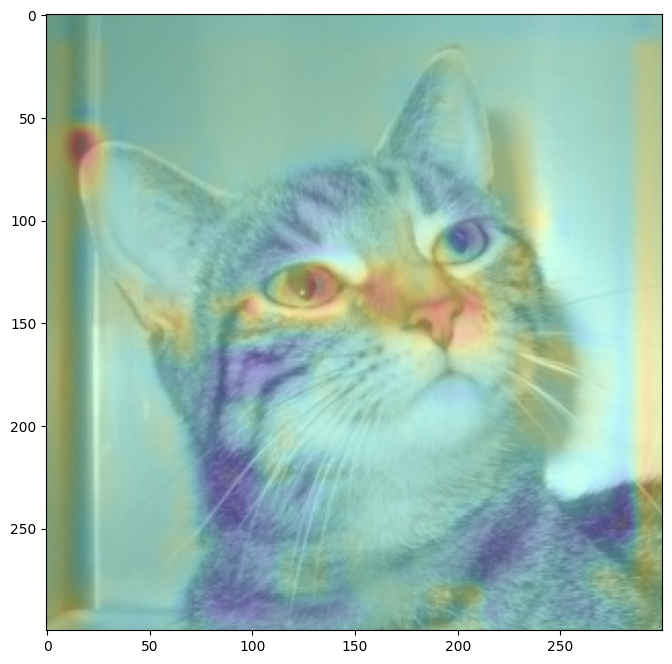

ground truth: cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
sigmoid output: [[0.47415704]]
prediction: cat


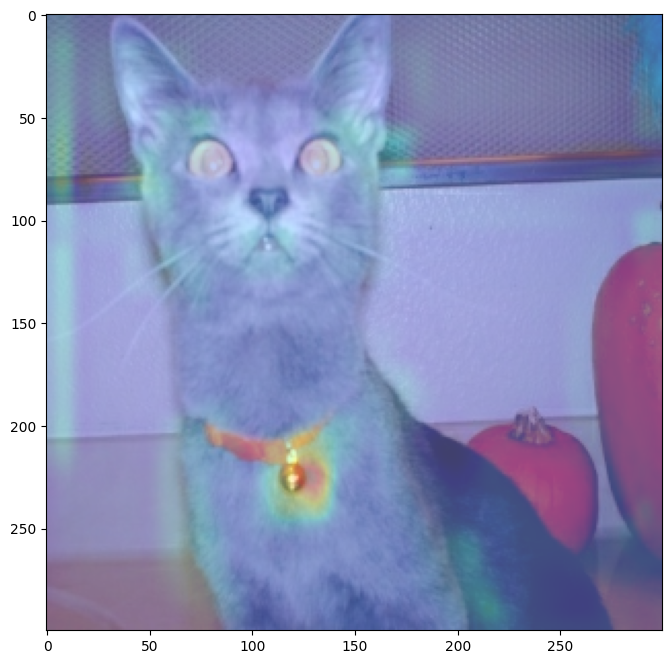

In [21]:
# preprocess the test images
augmented_test_data = test_data.map(augment_images)
test_batches = augmented_test_data.batch(1)


for img, lbl in test_batches.take(5):
  print(f"ground truth: {'dog' if lbl else 'cat'}")
  features,results = cam_model.predict(img)
  show_cam(img, features, results)

If the training reached 80% accuracy, it might be noticed from the images above that the presence of eyes and nose play a big part in determining a dog, while whiskers and a colar mostly point to a cat. Some can be misclassified based on the presence or absence of these features. This tells us that the model is not yet performing optimally and we need to tweak our process (e.g. add more data, train longer, use a different model, etc).